# Proyek Analisis Data Sepak Bola EPL 2020-2021

Proyek Analisis Data sepakbola ini akan mengajari Anda cara melakukan analisis data eksplorasi menggunakan Python pada kumpulan data terkait sepak bola. sepak bola adalah permainan dengan penggemar terbesar di dunia. Anda akan belajar cara menganalisis, memvisualisasikan, dan menggambar wawasan dengan pustaka dan fungsi Python.

Dataset ini adalah kumpulan statistik dasar tetapi penting dari Liga Premier Inggris musim 2020-21. Dataset memiliki semua pemain yang bermain di EPL dan statistik standar mereka seperti Gol, Assist, xG, xA, Passes Attempted, Pass Accuracy, dan banyak lagi! Lakukan upvote jika Anda menyukainya!

In [1]:
# Import Libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Menampilkan Dataset

epl_df = pd.read_csv('EPL_20_21.csv')
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [4]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [5]:
epl_df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [6]:
# Membuat 2 kolom baru yaitu menit per match dan goal per match

epl_df['MinsPerMatch'] = (epl_df['Mins'] / epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch'] = (epl_df['Goals'] / epl_df['Matches']).astype(float)
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [7]:
# Total Goals

Total_Goals = epl_df['Goals'].sum()
Total_Goals

986

In [8]:
# Goal Pinalti

Total_Penalty_Goals = epl_df['Penalty_Goals'].sum()
Total_Penalty_Goals

102

In [9]:
# Percobaan tendangan Pinalti 

Total_Penalty_Attempts = epl_df['Penalty_Attempted'].sum()
Total_Penalty_Attempts

125

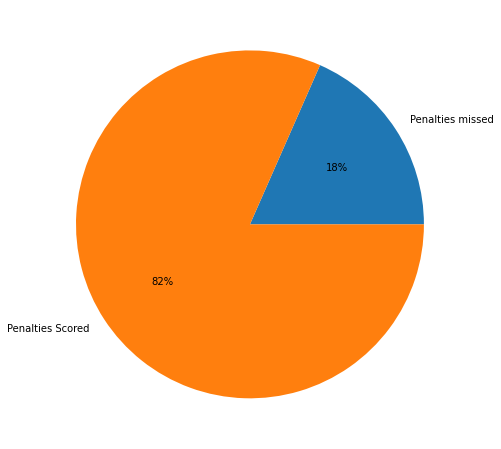

In [10]:
# Diagram longkaran untuk Pinalti Berhasil dan Pinalti gagal

plt.figure(figsize=(15,8))
pl_not_scored = epl_df['Penalty_Attempted'].sum() - Total_Penalty_Goals
data = [pl_not_scored, Total_Penalty_Goals]
labels = ['Penalties missed', 'Penalties Scored']
plt.pie(data, labels = labels, autopct = '%.0f%%')
plt.show()

In [11]:
# posisi unik

epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [12]:
# Total pemain posisi FW

epl_df[epl_df['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [13]:
# Pemain dari berbagai negara

np.size((epl_df['Nationality'].unique()))

59

<AxesSubplot:xlabel='Nationality'>

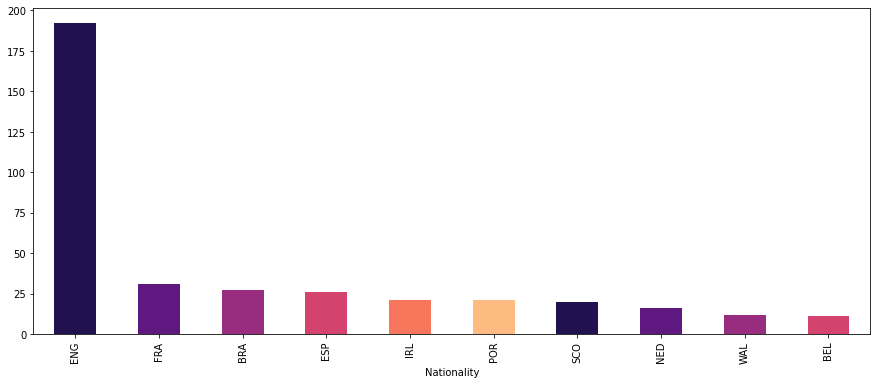

In [14]:
# Banyanya pemain berasal dari negara mana

nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(10).plot(kind = 'bar', figsize = (15,6), color = sns.color_palette("magma"))

<AxesSubplot:>

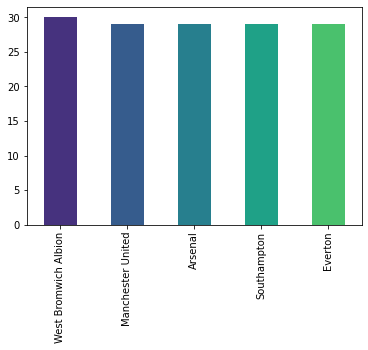

In [15]:
# klub dengan pemain maksimal di skuad mereka

epl_df['Club'].value_counts().nlargest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

<AxesSubplot:>

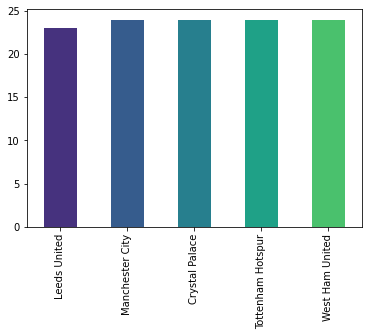

In [16]:
# klub dengan pemain minimal di akuad mereka

epl_df['Club'].value_counts().nsmallest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

In [17]:
# pemain berdasarkan kelompok umur

Under20 = epl_df[epl_df['Age'] <= 20]
age20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <= 25)]
age25_30 = epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <= 30)]
above30 = epl_df[epl_df['Age'] > 30]

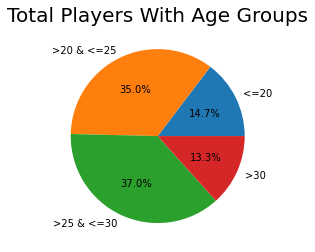

In [18]:
x = np.array([Under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),above30['Name'].count()])
mylabels = ["<=20", ">20 & <=25", ">25 & <=30", ">30"]
plt.title('Total Players With Age Groups', fontsize = 20)
plt.pie(x, labels = mylabels, autopct = "%.1f%%")
plt.show()

<AxesSubplot:>

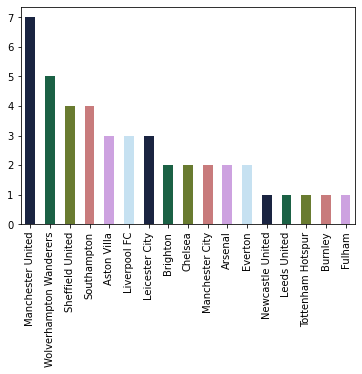

In [19]:
# Total pemain di bawah umur 20 tahun pada setiap klub

players_under_20 = epl_df[epl_df['Age'] < 20]
players_under_20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette("cubehelix"))

In [20]:
# Pemain U-20 di Manchester United

players_under_20[players_under_20["Club"]=='Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [21]:
# Pemain U-20 di Chelsea

players_under_20[players_under_20["Club"]=='Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

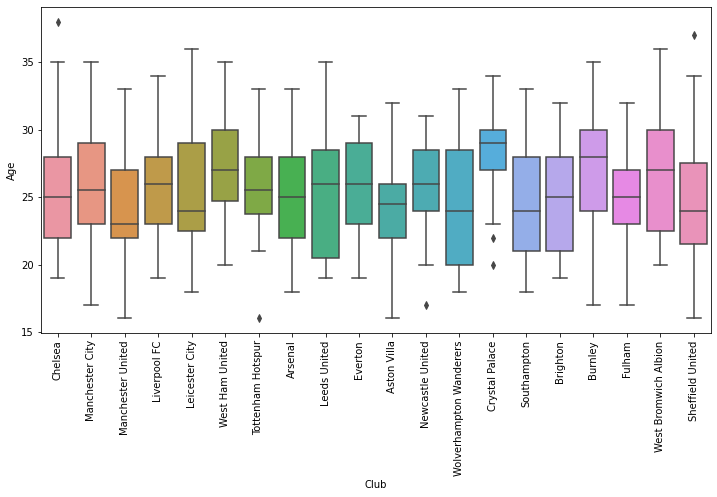

In [22]:
# Rata-rata umur pemain di setiap club

plt.figure(figsize=(12,6))
sns.boxplot(x = 'Club', y = 'Age', data = epl_df)
plt.xticks(rotation = 90)

In [23]:
num_player = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum())/ num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

Text(0.5, 1.0, 'plot of Clubs vs Total Assists')

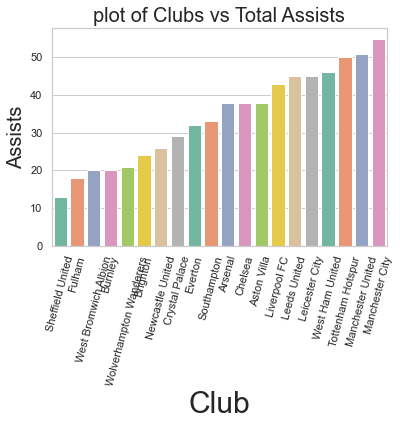

In [24]:
# Total assists dari setiap club

Assists_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index = False)['Assists'].sum())
sns.set_theme(style = "whitegrid", color_codes = True)
ax = sns.barplot(x = 'Club', y = 'Assists', data = Assists_by_clubs.sort_values(by = "Assists"), palette = 'Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Assists", fontsize = 20)
plt.xticks(rotation = 75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('plot of Clubs vs Total Assists', fontsize = 20)

In [25]:
# 10 Assists terbaik

top_10_assists = epl_df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n=10, columns = 'Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Text(0.5, 1.0, 'Plot of Clubs vs Total Goals')

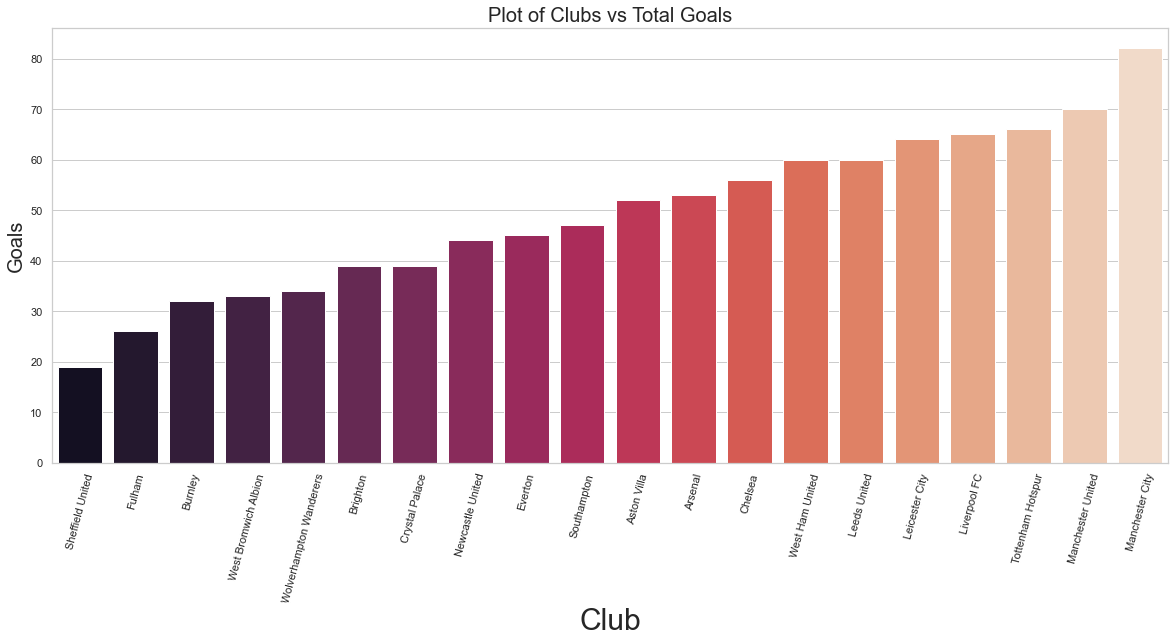

In [26]:
Goals_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index = False)['Goals'].sum())
sns.set_theme(style = "whitegrid", color_codes = True)
ax = sns.barplot(x = 'Club', y = "Goals", data = Goals_by_clubs.sort_values(by = "Goals"), palette = 'rocket')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Goals", fontsize = 20)
plt.xticks(rotation = 75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Goals', fontsize = 20)

In [27]:
# Pemain Dengan Goal Terbanyak

top_10_goals = epl_df[['Name', 'Club', 'Goals', 'Matches']].nlargest(n = 10, columns = 'Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [29]:
# Goal Setiap Pertandingan

top_10_goals_per_match = epl_df[['Name', 'GoalsPerMatch', 'Matches', 'Goals']].nlargest(n = 10, columns = 'GoalsPerMatch')
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


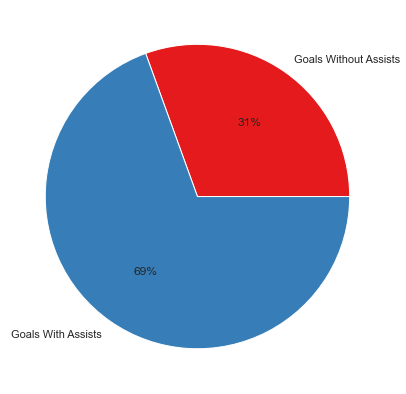

In [32]:
# Pir Chart - Gol dengan Assist dan tanpa Assist

plt.figure(figsize = (14,7))
assists = epl_df['Assists'].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals Without Assists', 'Goals With Assists']
color = sns.color_palette('Set1')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

C:\Users\Hafiz Sukmono\anaconda3\lib\site-packages\seaborn\categorical.py:1604: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  barfunc(barpos, self.statistic, self.width,


<AxesSubplot:title={'center':'Players with the most yellow cards'}, xlabel='Name', ylabel='Number of Yellow Cards'>

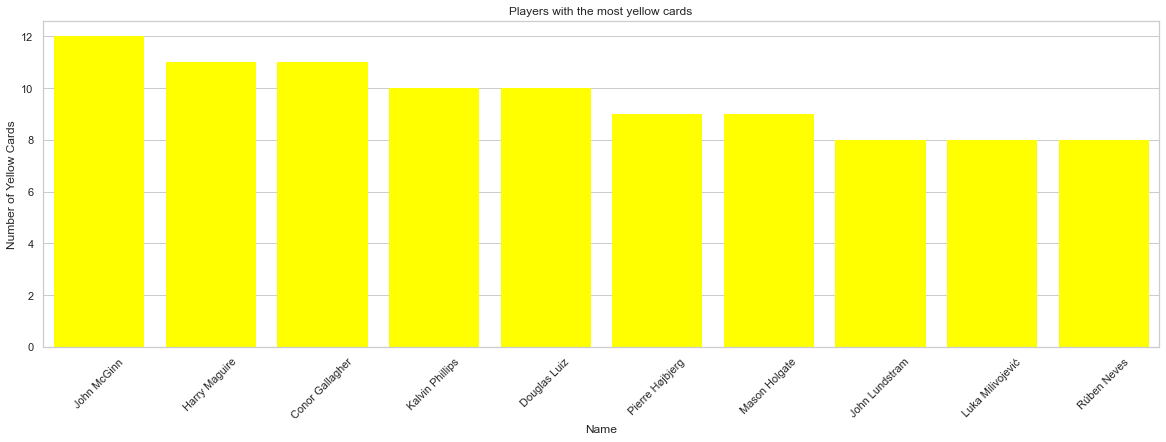

In [34]:
# 10 Pemain Teratas dengan Kartu Kuning T0erbanyak

epl_yellow = epl_df.sort_values(by = 'Yellow_Cards', ascending = False)[:10]
plt.figure(figsize = (20,6))
plt.title("Players with the most yellow cards")
c = sns.barplot(x = epl_yellow['Name'], y = epl_yellow['Yellow_Cards'], label = 'Players', Color = 'yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(), rotation = 45)
c